In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
org_df = pd.read_csv("FuelConsumption.csv")
org_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
org_df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = org_df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


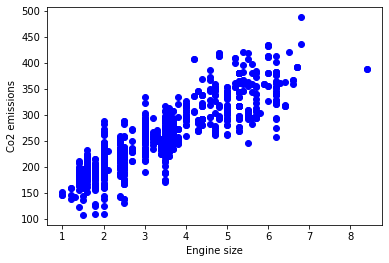

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine size")
plt.ylabel("Co2 emissions")
plt.show()

In [6]:
msk = np.random.rand(len(cdf)) <.8
train = cdf[msk]
test = cdf[~msk]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x_train = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)


In [8]:
reg = linear_model.LinearRegression()
reg.fit(x_train_poly, y_train)

print("Coefficients:", reg.coef_)
print("Intersept:", reg.intercept_)

Coefficients: [[ 0.         -4.54203319 -8.72875046 30.3299633   1.75706834 -8.65049419
   4.35789355  1.73505021  1.8751835  -1.76921799]]
Intersept: [9.48281267]


In [9]:
from sklearn.metrics import r2_score

x_test_poly = poly.fit_transform(x_test)
y_ = reg.predict(x_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_ ) )

Mean absolute error: 11.18
Residual sum of squares (MSE): 397.99
R2-score: 0.90


### Jadi:

In [10]:
x_train = np.asanyarray(train[["ENGINESIZE"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["ENGINESIZE"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)


reg = linear_model.LinearRegression()
reg.fit(x_train_poly, y_train)

print("Coefficients:", reg.coef_)
print("Intersept:", reg.intercept_)

x_test_poly = poly.fit_transform(x_test)
y_ = reg.predict(x_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_ ) )

Coefficients: [[ 0.         48.28725242 -1.22362068]]
Intersept: [110.5103346]
Mean absolute error: 22.29
Residual sum of squares (MSE): 921.32
R2-score: 0.77
